In [2]:
from tqdm.auto import tqdm

In [3]:
oscar_data_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Language Modelling/Datasets/Oscar_nepali_dataset/ne_dedup.txt"

In [4]:
with open(oscar_data_path) as f:
  lines = f.readlines()

In [5]:
len(lines)

1490594

In [6]:
lines[100]

'सरसफाइको प्रतिक भनेर चिनिने हरियो रंङले गाउँ हरियाली बनेको छ । सुकिदह गाउँपालिका वडा नं. ३ मा करिब ७ सय घरहरु रहेका छन । ती घरमध्ये ८७ प्रतिशत घरमा हरियो रङ लगाइसकेको वडा सचिब कमलराज वलीले जानकारी दिए ।\n'

In [7]:
lines[100].split()

['सरसफाइको',
 'प्रतिक',
 'भनेर',
 'चिनिने',
 'हरियो',
 'रंङले',
 'गाउँ',
 'हरियाली',
 'बनेको',
 'छ',
 '।',
 'सुकिदह',
 'गाउँपालिका',
 'वडा',
 'नं.',
 '३',
 'मा',
 'करिब',
 '७',
 'सय',
 'घरहरु',
 'रहेका',
 'छन',
 '।',
 'ती',
 'घरमध्ये',
 '८७',
 'प्रतिशत',
 'घरमा',
 'हरियो',
 'रङ',
 'लगाइसकेको',
 'वडा',
 'सचिब',
 'कमलराज',
 'वलीले',
 'जानकारी',
 'दिए',
 '।']

In [8]:
word_to_frequency = {}
for line in tqdm(lines):
  for word in line.split():
    word_to_frequency[word] = word_to_frequency.get(word, 0) + 1

  0%|          | 0/1490594 [00:00<?, ?it/s]

In [9]:
len(word_to_frequency)

2205701

In [10]:
cutoff_frequency = 50
lower_cutoff_word_freq = {}
higher_cutoff_word_frequency = {}
for word, freq in word_to_frequency.items():
  if freq > cutoff_frequency:
    higher_cutoff_word_frequency[word] = freq
  else:
    lower_cutoff_word_freq[word] = freq

In [11]:
len(lower_cutoff_word_freq), len(higher_cutoff_word_frequency), len(lower_cutoff_word_freq) + len(higher_cutoff_word_frequency)

(2137573, 68128, 2205701)

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


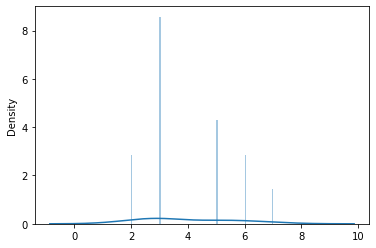

In [13]:
a = [2, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 6, 6, 7]
sns.distplot(a, bins = 100)

In [18]:
def distplot(values, bins = 50):
  sns.displot(values, bins = bins, kde = True)

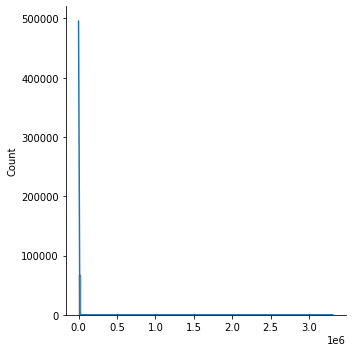

In [15]:
higher_cutoff_frequency = list(higher_cutoff_word_frequency.values())
distplot(higher_cutoff_frequency)

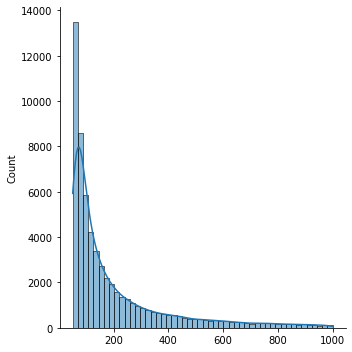

In [29]:
fifty_to_1000 = [freq for freq in higher_cutoff_frequency if freq > 50 and freq <= 1000]
distplot(fifty_to_1000)

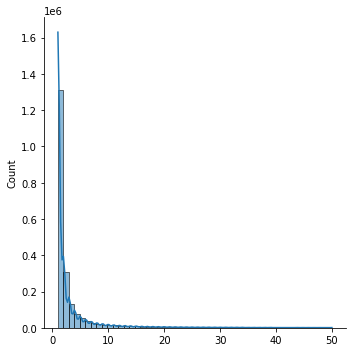

In [28]:
lower_cutoff_frequency = list(lower_cutoff_word_freq.values())
distplot(lower_cutoff_frequency)

In [30]:
zero_to_1000 = lower_cutoff_frequency + fifty_to_1000

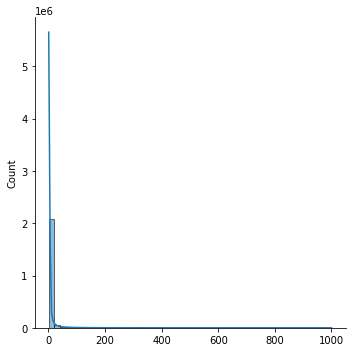

In [32]:
distplot(zero_to_1000)